### OLS Task02

#### 한국 아파트 가격 예측
https://drive.google.com/file/d/1v3eNjo3TjTgUPlq6Uw_v_oEQ8sVjaItw/view?usp=share_link

In [1]:
import pandas as pd
import numpy as np

In [2]:
a_df = pd.read_csv('./datasets/korean_apart.csv')
a_df

C:\Users\user\AppData\Local\Temp\ipykernel_20452\2129855302.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  a_df = pd.read_csv('./datasets/korean_apart.csv')


지역코드        동                  거래일         아파트      지번      전용면적  \
0        31110.0      학성동       5/30/2020 0:00      남운학성타운     379  135.5800   
1        31110.0      남외동        1/3/2020 0:00    남외푸르지오1차   506-1  101.6000   
2        31110.0      남외동        1/3/2020 0:00       에일린의뜰     500   84.9920   
3        31110.0      남외동        1/3/2020 0:00    남외푸르지오1차   506-1  118.7060   
4        31110.0      남외동        1/4/2020 0:00    남외푸르지오2차   501-1   84.9636   
...          ...      ...                  ...         ...     ...       ...   
5002834  50130.0  대정읍 하모리  2023-06-29 00:00:00     더그라벨아파트  1221-1   57.1300   
5002835  50130.0      동홍동  2023-07-04 00:00:00  주공5차(동홍5차)    1674   49.8700   
5002836  50130.0      서홍동  2023-07-04 00:00:00      서홍반석타운  2004-1   45.3100   
5002837  50130.0      중문동  2023-07-01 00:00:00      중문푸른마을    1789   51.8800   
5002838  50130.0      중문동  2023-07-01 00:00:00     e편한세상중문    1726   84.9875   

          층    건축년도    거래금액  
0         8  1991.0   26700  
1         2  2006.0   35500  
2        11  2007.0   36500  
3         8  2006.0   43000  
4         7  2007.0   38700  
...      ..     ...     ...  
5002834   6  2019.0  19,500  
5002835   2  1999.0  21,700  
5002836   1  2000.0   9,300  
5002837   2  2003.0  25,500  
5002838   5  2021.0  52,500  

[5002839 rows x 9 columns]

In [3]:
a_df = a_df.drop(labels=['지역코드', '지번'], axis=1)
a_df

동                  거래일         아파트      전용면적   층    건축년도  \
0            학성동       5/30/2020 0:00      남운학성타운  135.5800   8  1991.0   
1            남외동        1/3/2020 0:00    남외푸르지오1차  101.6000   2  2006.0   
2            남외동        1/3/2020 0:00       에일린의뜰   84.9920  11  2007.0   
3            남외동        1/3/2020 0:00    남외푸르지오1차  118.7060   8  2006.0   
4            남외동        1/4/2020 0:00    남외푸르지오2차   84.9636   7  2007.0   
...          ...                  ...         ...       ...  ..     ...   
5002834  대정읍 하모리  2023-06-29 00:00:00     더그라벨아파트   57.1300   6  2019.0   
5002835      동홍동  2023-07-04 00:00:00  주공5차(동홍5차)   49.8700   2  1999.0   
5002836      서홍동  2023-07-04 00:00:00      서홍반석타운   45.3100   1  2000.0   
5002837      중문동  2023-07-01 00:00:00      중문푸른마을   51.8800   2  2003.0   
5002838      중문동  2023-07-01 00:00:00     e편한세상중문   84.9875   5  2021.0   

           거래금액  
0         26700  
1         35500  
2         36500  
3         43000  
4         38700  
...         ...  
5002834  19,500  
5002835  21,700  
5002836   9,300  
5002837  25,500  
5002838  52,500  

[5002839 rows x 7 columns]

In [4]:
group_df = a_df.groupby('거래일').sum('거래금액').reset_index()
group_df

거래일          전용면적       건축년도
0      1/1/2018 0:00    9884.95760   257898.0
1      1/1/2019 0:00    8667.09030   224309.0
2      1/1/2020 0:00   19136.98700   485355.0
3          1/10/2018     219.45000     5985.0
4     1/10/2018 0:00  112469.61120  2808980.0
...              ...           ...        ...
5843   9/8/2019 0:00   27474.99070   698242.0
5844   9/8/2020 0:00   86267.72240  2257622.0
5845   9/9/2018 0:00   52607.34350  1331906.0
5846   9/9/2019 0:00   67436.48420  1769151.0
5847   9/9/2020 0:00   79506.68745  2092856.0

[5848 rows x 3 columns]

In [5]:
group_df['거래일'].value_counts()

거래일
1/1/2018 0:00          1
2020-09-10             1
2020-09-08 00:00:00    1
2020-09-07 00:00:00    1
2020-09-07             1
                      ..
2017-03-19 00:00:00    1
2017-03-19             1
2017-03-18 00:00:00    1
2017-03-18             1
9/9/2020 0:00          1
Name: count, Length: 5848, dtype: int64

In [6]:
a_df.isna().sum()

동        0
거래일      0
아파트      0
전용면적     0
층        0
건축년도    76
거래금액     0
dtype: int64

In [7]:
a_df = a_df.dropna()

In [8]:
a_df.isna().sum()

동       0
거래일     0
아파트     0
전용면적    0
층       0
건축년도    0
거래금액    0
dtype: int64

In [9]:
a_df.duplicated().sum()

313467

In [10]:
a_df = a_df.drop_duplicates()

In [11]:
a_df

동                  거래일         아파트      전용면적   층    건축년도  \
0            학성동       5/30/2020 0:00      남운학성타운  135.5800   8  1991.0   
1            남외동        1/3/2020 0:00    남외푸르지오1차  101.6000   2  2006.0   
2            남외동        1/3/2020 0:00       에일린의뜰   84.9920  11  2007.0   
3            남외동        1/3/2020 0:00    남외푸르지오1차  118.7060   8  2006.0   
4            남외동        1/4/2020 0:00    남외푸르지오2차   84.9636   7  2007.0   
...          ...                  ...         ...       ...  ..     ...   
5002834  대정읍 하모리  2023-06-29 00:00:00     더그라벨아파트   57.1300   6  2019.0   
5002835      동홍동  2023-07-04 00:00:00  주공5차(동홍5차)   49.8700   2  1999.0   
5002836      서홍동  2023-07-04 00:00:00      서홍반석타운   45.3100   1  2000.0   
5002837      중문동  2023-07-01 00:00:00      중문푸른마을   51.8800   2  2003.0   
5002838      중문동  2023-07-01 00:00:00     e편한세상중문   84.9875   5  2021.0   

           거래금액  
0         26700  
1         35500  
2         36500  
3         43000  
4         38700  
...         ...  
5002834  19,500  
5002835  21,700  
5002836   9,300  
5002837  25,500  
5002838  52,500  

[4689296 rows x 7 columns]

In [12]:
a_df.duplicated().sum()

0

In [13]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4689296 entries, 0 to 5002838
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   동       object 
 1   거래일     object 
 2   아파트     object 
 3   전용면적    float64
 4   층       object 
 5   건축년도    float64
 6   거래금액    object 
dtypes: float64(2), object(5)
memory usage: 286.2+ MB


In [14]:
a_df['거래일'].value_counts()

거래일
2020-06-13 00:00:00    6231
2020-06-16 00:00:00    5885
2020-02-15 00:00:00    4997
2020-06-15 00:00:00    4939
2020-07-04 00:00:00    4828
                       ... 
2016-08-19                1
2016-08-02                1
2016-08-25                1
2019-05-11                1
2015-12-06                1
Name: count, Length: 5848, dtype: int64

In [15]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4689296 entries, 0 to 5002838
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   동       object 
 1   거래일     object 
 2   아파트     object 
 3   전용면적    float64
 4   층       object 
 5   건축년도    float64
 6   거래금액    object 
dtypes: float64(2), object(5)
memory usage: 286.2+ MB


In [16]:
a_df

동                  거래일         아파트      전용면적   층    건축년도  \
0            학성동       5/30/2020 0:00      남운학성타운  135.5800   8  1991.0   
1            남외동        1/3/2020 0:00    남외푸르지오1차  101.6000   2  2006.0   
2            남외동        1/3/2020 0:00       에일린의뜰   84.9920  11  2007.0   
3            남외동        1/3/2020 0:00    남외푸르지오1차  118.7060   8  2006.0   
4            남외동        1/4/2020 0:00    남외푸르지오2차   84.9636   7  2007.0   
...          ...                  ...         ...       ...  ..     ...   
5002834  대정읍 하모리  2023-06-29 00:00:00     더그라벨아파트   57.1300   6  2019.0   
5002835      동홍동  2023-07-04 00:00:00  주공5차(동홍5차)   49.8700   2  1999.0   
5002836      서홍동  2023-07-04 00:00:00      서홍반석타운   45.3100   1  2000.0   
5002837      중문동  2023-07-01 00:00:00      중문푸른마을   51.8800   2  2003.0   
5002838      중문동  2023-07-01 00:00:00     e편한세상중문   84.9875   5  2021.0   

           거래금액  
0         26700  
1         35500  
2         36500  
3         43000  
4         38700  
...         ...  
5002834  19,500  
5002835  21,700  
5002836   9,300  
5002837  25,500  
5002838  52,500  

[4689296 rows x 7 columns]

In [17]:
a_df = a_df.drop(labels=['거래일'], axis=1)
a_df.reset_index()
a_df

동         아파트      전용면적   층    건축년도    거래금액
0            학성동      남운학성타운  135.5800   8  1991.0   26700
1            남외동    남외푸르지오1차  101.6000   2  2006.0   35500
2            남외동       에일린의뜰   84.9920  11  2007.0   36500
3            남외동    남외푸르지오1차  118.7060   8  2006.0   43000
4            남외동    남외푸르지오2차   84.9636   7  2007.0   38700
...          ...         ...       ...  ..     ...     ...
5002834  대정읍 하모리     더그라벨아파트   57.1300   6  2019.0  19,500
5002835      동홍동  주공5차(동홍5차)   49.8700   2  1999.0  21,700
5002836      서홍동      서홍반석타운   45.3100   1  2000.0   9,300
5002837      중문동      중문푸른마을   51.8800   2  2003.0  25,500
5002838      중문동     e편한세상중문   84.9875   5  2021.0  52,500

[4689296 rows x 6 columns]

In [18]:
pre_df = a_df[['전용면적','층','건축년도','거래금액']]
pre_df

전용면적   층    건축년도    거래금액
0        135.5800   8  1991.0   26700
1        101.6000   2  2006.0   35500
2         84.9920  11  2007.0   36500
3        118.7060   8  2006.0   43000
4         84.9636   7  2007.0   38700
...           ...  ..     ...     ...
5002834   57.1300   6  2019.0  19,500
5002835   49.8700   2  1999.0  21,700
5002836   45.3100   1  2000.0   9,300
5002837   51.8800   2  2003.0  25,500
5002838   84.9875   5  2021.0  52,500

[4689296 rows x 4 columns]

In [19]:
pre_df.reset_index()

index      전용면적   층    건축년도    거래금액
0              0  135.5800   8  1991.0   26700
1              1  101.6000   2  2006.0   35500
2              2   84.9920  11  2007.0   36500
3              3  118.7060   8  2006.0   43000
4              4   84.9636   7  2007.0   38700
...          ...       ...  ..     ...     ...
4689291  5002834   57.1300   6  2019.0  19,500
4689292  5002835   49.8700   2  1999.0  21,700
4689293  5002836   45.3100   1  2000.0   9,300
4689294  5002837   51.8800   2  2003.0  25,500
4689295  5002838   84.9875   5  2021.0  52,500

[4689296 rows x 5 columns]

array([[<Axes: title={'center': '전용면적'}>,
        <Axes: title={'center': '건축년도'}>]], dtype=object)

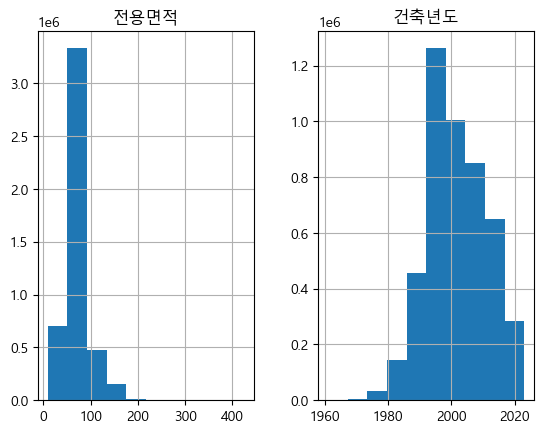

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
pre_df.hist()

In [21]:
def convert_to_float(value):
    if isinstance(value, str):
        if ',' in value:
            return float(value.replace(',', ''))
        else:
            return float(value)
    else:
        return float(value)

In [22]:
pre_df['거래금액'] = pre_df['거래금액'].apply(convert_to_float)

C:\Users\user\AppData\Local\Temp\ipykernel_20452\740215487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['거래금액'] = pre_df['거래금액'].apply(convert_to_float)


In [23]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4689296 entries, 0 to 5002838
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   전용면적    float64
 1   층       object 
 2   건축년도    float64
 3   거래금액    float64
dtypes: float64(3), object(1)
memory usage: 178.9+ MB


In [24]:
pre_df['거래금액'].value_counts()

거래금액
25000.0    37369
20000.0    37177
23000.0    35505
18000.0    34635
30000.0    34368
           ...  
48015.0        1
62240.0        1
62785.0        1
62080.0        1
39175.0        1
Name: count, Length: 28059, dtype: int64

In [25]:
pre_df.reset_index(drop=True)

전용면적   층    건축년도     거래금액
0        135.5800   8  1991.0  26700.0
1        101.6000   2  2006.0  35500.0
2         84.9920  11  2007.0  36500.0
3        118.7060   8  2006.0  43000.0
4         84.9636   7  2007.0  38700.0
...           ...  ..     ...      ...
4689291   57.1300   6  2019.0  19500.0
4689292   49.8700   2  1999.0  21700.0
4689293   45.3100   1  2000.0   9300.0
4689294   51.8800   2  2003.0  25500.0
4689295   84.9875   5  2021.0  52500.0

[4689296 rows x 4 columns]

In [26]:
# 거래금액 피처의 값 개수를 계산하여 불리언 시리즈 생성
counts_series = pre_df['거래금액'].value_counts()

# 값 개수가 1개 이하인 행들을 추출하여 새로운 데이터프레임 생성
result_df = pre_df[pre_df['거래금액'].isin(counts_series[counts_series <= 1].index)]

# result_df의 인덱스를 재설정하여 인덱스가 일치하도록 함
result_df.reset_index(drop=True, inplace=True)

# pre_df에서 result_df의 인덱스를 제외한 나머지 행들만 남기기
pre_df = pre_df[~pre_df.index.isin(result_df.index)]

# 인덱스를 재설정하여 새로운 데이터프레임을 생성
pre_df.reset_index(drop=True, inplace=True)


In [27]:
pre_df['거래금액'].value_counts()

거래금액
25000.0     37230
20000.0     37043
23000.0     35405
18000.0     34543
30000.0     34255
            ...  
72060.0         1
14034.0         1
61820.0         1
136852.0        1
39175.0         1
Name: count, Length: 28059, dtype: int64

In [28]:
pre_df['거래금액'] = pre_df['거래금액'].astype(np.int64)
pre_df['건축년도'] = pre_df['건축년도'].astype(np.int64)

C:\Users\user\AppData\Local\Temp\ipykernel_20452\2587320089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['거래금액'] = pre_df['거래금액'].astype(np.int64)
C:\Users\user\AppData\Local\Temp\ipykernel_20452\2587320089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['건축년도'] = pre_df['건축년도'].astype(np.int64)


In [29]:
pre_df['전용면적'] = pre_df['전용면적'].astype(np.int64)

C:\Users\user\AppData\Local\Temp\ipykernel_20452\4273680535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['전용면적'] = pre_df['전용면적'].astype(np.int64)


In [30]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677883 entries, 0 to 4677882
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   전용면적    int64 
 1   층       object
 2   건축년도    int64 
 3   거래금액    int64 
dtypes: int64(3), object(1)
memory usage: 142.8+ MB


In [31]:
pre_df = pre_df.drop(labels=['층'], axis=1)

In [32]:
pre_df.corr()['거래금액'].sort_values(ascending=False)[1:]

전용면적    0.481400
건축년도    0.183635
Name: 거래금액, dtype: float64

<Axes: >

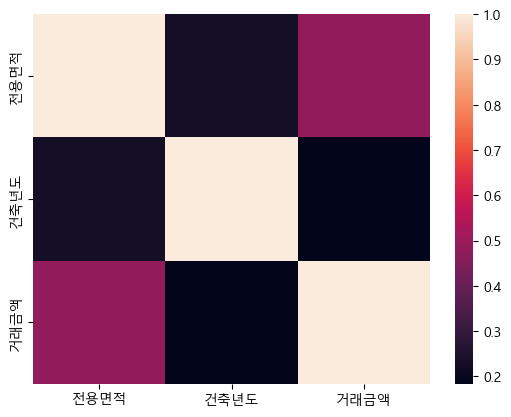

In [33]:
import seaborn as sns

sns.heatmap(pre_df.corr())

In [34]:
from statsmodels.api import OLS
features, targets = pre_df.iloc[:,:-1] , pre_df.iloc[:,-1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.651
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                          4.371e+06
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:24:45   Log-Likelihood:                     -5.3952e+07
No. Observations:             4677883   AIC:                                  1.079e+08
Df Residuals:                 4677881   BIC:                                  1.079e+08
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
print(features.values)
print(features.shape[1])

[[  59 1994]
 [  48 1996]
 [  59 2004]
 ...
 [  45 2000]
 [  51 2003]
 [  84 2021]]
2


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def features_engineering_VIF(features) :
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [37]:
display(features_engineering_VIF(features))
# 다중 공선성에 문제가 있는 것으로 의심됨 

score feature
0  9.251971    전용면적
1  9.251971    건축년도

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


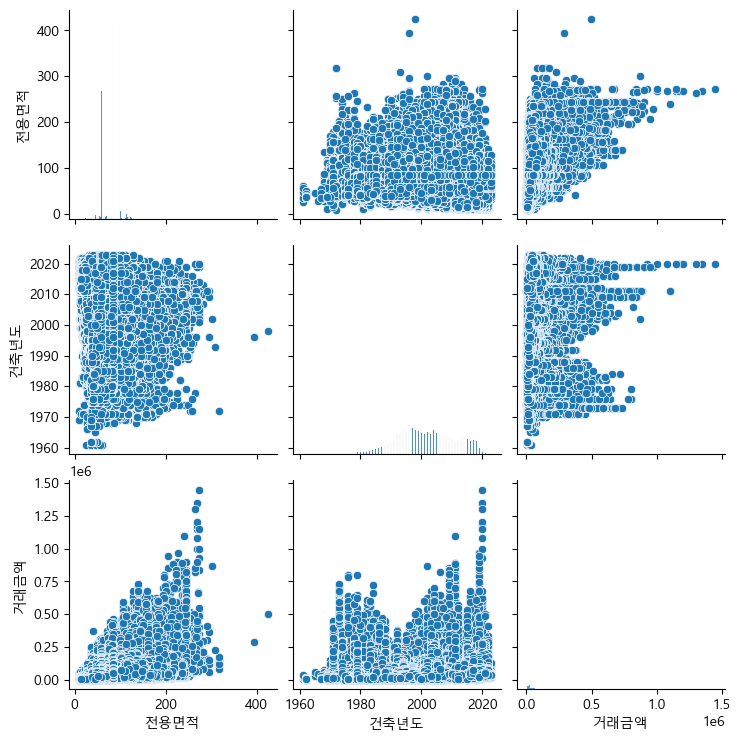

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['전용면적' , '건축년도' , '거래금액']
sns.pairplot(pre_df[columns])
plt.show()

In [43]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677883 entries, 0 to 4677882
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   전용면적    int64
 1   건축년도    int64
 2   거래금액    int64
dtypes: int64(3)
memory usage: 107.1 MB


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

features, targets = pre_df.iloc[:,:-1] , pre_df.iloc[:,-1]

torch.manual_seed(105)

X_train ,X_test , y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)


X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1 , 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1 , 1)

l_r = Linear(2,1)

optimizer = SGD(l_r.parameters(), lr=1e-15)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=100, shuffle=True) # 미니 배치 구축 

epochs = 1000

for epoch in range(1, epochs + 1 ) :
    for i , samples in enumerate(dl) :

        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')


Epoch: 10/1000, Batch: 1/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 1660657792.0
Epoch: 10/1000, Batch: 2/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 3900076800.0
Epoch: 10/1000, Batch: 3/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 2002778496.0
Epoch: 10/1000, Batch: 4/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 1365194624.0
Epoch: 10/1000, Batch: 5/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 1859353472.0
Epoch: 10/1000, Batch: 6/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 1571702016.0
Epoch: 10/1000, Batch: 7/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 1701822080.0
Epoch: 10/1000, Batch: 8/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 1886622848.0
Epoch: 10/1000, Batch: 9/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 1883854464.0
Epoch: 10/1000, Batch: 10/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 1164087168.0
Epoch: 10/1000, Batch: 11/37424, W1: -0.086, W2: -0.6152, b: -0.1731
loss: 1564030720.0
Epoch: 10/1000, Batch: 12/37424, W1: -0.0

In [49]:
X_train.values

array([[  68, 1990],
       [  84, 2018],
       [ 149, 2014],
       ...,
       [  59, 1995],
       [  84, 2005],
       [  41, 1993]], dtype=int64)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f},  R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [47]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 601007933.7058, RMSE: 24515.4632,  R2: 0.2359
